# <center> Zestaw 9
## <center> Ryszard Pręcikowski
### <center> 401433

# Zadanie 1


## $f(x, y) = x^2 - 5xy + y^2$

gradient:
$\nabla f(x, y) =
\begin{pmatrix}
2(x-2y) & 2y - 4x 
\end{pmatrix}
$

macierz Hessego:
$
H = 
\begin{pmatrix}
2 & -4\\
-4 & 2
\end{pmatrix}
$

$det H = -12$

$f_{xx} = 2$

Punkty w których pochodne się zerują:

$p_1 = (0, 0)$

punkt $p_1$ to punkt siodłowy

Funkcja nie ma extremów globalnych (wartosci funkcji uciekają do $+/- \infty$)

## $f(x, y) = x^4 - 4xy + y^4$

gradient:
$\nabla f(x, y) =
\begin{pmatrix}
4(x^3 - y) & 4y^3 - 4x 
\end{pmatrix}
$

macierz Hessego:
$
H = 
\begin{pmatrix}
12x^2 & -4\\
-4 & 12y^2
\end{pmatrix}
$

$det H = 144x^2y^2 - 16$

$f_{xx} = 12x^2$

Punkty w których pochodne się zerują:

$p_1 = (0, 0)$

$p_2 = (-1, -1)$

$p_3 = (1, 1)$

punkt $p_1$ to punkt siodłowy (ujemny hessian)

dla punktów $p_2$ i $p_3$ $det H > 0$ i $f_{xx} > 0$

$p_2$ i $p_3$ to minima lokalne

$p_2$ i $p_3$ to też minima globalne (wartości funkcji uciekają tylko do $+\infty$)

## $f(x, y) = 2x^3 - 3x^2 - 6xy(x-y-1)$

gradient:
$\nabla f(x, y) =
\begin{pmatrix}
6(x^2 - 2xy - x + y^2 + y) & -6x(x-2y-1)
\end{pmatrix}
$

macierz Hessego:
$
H = 
\begin{pmatrix}
12x - 12 y - 6 & -6(x-y-1) - 6x + 6y\\
-6(x-y-1) - 6x + 6y & 12x
\end{pmatrix}
$

$det H = 36(2y+1)(2x-2y-1)$

$f_{xx} = 12x - 12y - 6$

Punkty w których pochodne się zerują:

$p_1 = (0, 0)$

$p_2 = (-1, -1)$

$p_3 = (1, 0)$

$p_4 = (0, -1)$

punkty $p_1$ i $p_4$ to punkty siodłowe (hessian jest ujemny)

dla punktu $p_2$ $det H > 0$ i $f_{xx} < 0$, więc $p_2$ to maksimum lokalne

dla punktu $p_3$ $det H > 0$ i $f_{xx} > 0$, więc $p_3$ to minimum lokalne

Funkcja nie posiada ekstremów globalnych.

## $f(x, y) = (x-y)^4 + x^2 - y^2 -2x + 2y + 1$

gradient:
$\nabla f(x, y) =
\begin{pmatrix}
-2 + 2 x + 4 (x - y)^3 &  2 - 4 (x - y)^3 - 2 y
\end{pmatrix}
$

macierz Hessego:
$
H = 
\begin{pmatrix}
12(x-y)^2 + 2   &   -12(x-y)^2\\
-12(x-y)^2      &   12(x-y)^2 -2
\end{pmatrix}
$

$det H = -4$

$f_{xx} = 12(x-y)^2 + 2$

Punkty w których pochodne się zerują:

$p_1 = (1, 1)$

punkt $p_1$ to punkt siodłowy (ujemny hessian)

Funkcja nie posiada ekstremów globalnych.

# Zadanie 2

In [1]:
import matplotlib.pyplot as plt
import sympy as sp
import numpy as np
from numpy.linalg import solve
from scipy.optimize import minimize_scalar
from pprint import pprint

def gradient(f, v):
    return sp.Matrix([f]).jacobian(v)

In [2]:
def steepest_descent(f, starting, num_iterations=10, plot_results=True, show_steps=True):
    v = list(sp.ordered(f.free_symbols))
    grad = gradient(f, v)
    _grad_l = sp.lambdify(v, grad)
    grad_l = lambda *x: _grad_l(*x)[0]

    x = starting
    f_l = sp.lambdify(v, f)
    a_s = sp.Symbol('a')

    x_v = [[] for _ in range(len(v))]

    if show_steps:
        print(x)

    for i in range(num_iterations):
        if plot_results:
            for j in range(len(v)):
                x_v[j].append(x[j])

        d = f_l(*x - a_s * grad_l(*x))
        d_l = sp.lambdify(a_s, d)

        a = minimize_scalar(d_l)['x']

        x = x - a * grad_l(*x)
        if show_steps:
            print(x)

    if show_steps:
        print()
        print("f(x) = {}".format(f_l(*x)))
        
    if plot_results:
        for j in range(len(v)):
            x_v[j].append(x[j])
        for j in range(len(v)):
            plt.plot(range(num_iterations+1), x_v[j], label=r'${}$'.format(v[j]))
        plt.legend()
        plt.show()

    return x

In [3]:
def Newtons_method(f, starting, num_iterations=10, print_steps=True, plot_results=True,):
    v = list(sp.ordered(f.free_symbols))

    grad = gradient(f, v)
    hess = sp.hessian(f, v)

    _grad_l = sp.lambdify(v, grad)
    grad_l = lambda *x: _grad_l(*x)[0]

    hess_l = sp.lambdify(v, hess)

    x = starting

    x_v = [[] for _ in range(len(v))]


    if print_steps:
        print(x)

    for i in range(num_iterations):
        if plot_results:
            for j in range(len(v)):
                x_v[j].append(x[j])

        s = solve(hess_l(*x), -grad_l(*x))

        x = x + s
        if print_steps:
            print(x)

    if print_steps:
        print()
        f_l = sp.lambdify(v, f)
        print("f(x) = {}".format(f_l(*x)))
        
    if plot_results:
        for j in range(len(v)):
            x_v[j].append(x[j])
        for j in range(len(v)):
            plt.plot(range(num_iterations+1), x_v[j], label=r'${}$'.format(v[j]))
        plt.legend()
        plt.show()
        
    return x

In [4]:
x_1 = sp.Symbol(r"x_{1}")
x_2 = sp.Symbol(r"x_{2}")

f = 100*(x_2 - x_1**2)**2 + (1 - x_1)**2

starting=[
    [-1, 1],
    [0, 1],
    [2, 1]
]


starting points: [-1, 1]


steepest descent
[-1, 1]
[-0.99497475  1.        ]
[-0.99497475  0.98997476]
[-0.989911    0.98997475]
[-0.98991101  0.97992382]
[-0.98480794  0.97992382]
[-0.98480795  0.96984672]
[-0.9796647   0.96984671]
[-0.97966471  0.95974295]
[-0.97448038  0.95974295]
[-0.97448039  0.94961204]

f(x) = 3.898572796588205


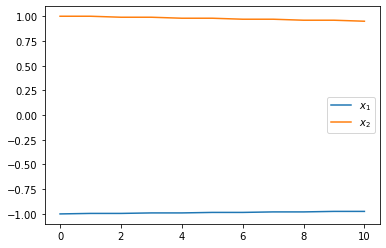

Newtons method
[-1, 1]
[ 1. -3.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]

f(x) = 0.0


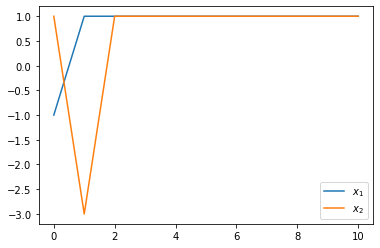


starting points: [0, 1]


steepest descent
[0, 1]
[9.99998980e-03 1.01973239e-06]
[0.1658164  0.00155918]
[0.16555873 0.02732652]
[0.2155373  0.02782631]
[0.21535258 0.0462986 ]
[0.24904098 0.04663549]
[0.24888863 0.06187081]
[0.27488959 0.06213082]
[0.2747567  0.07541912]
[0.2961744 0.0756333]

f(x) = 0.5099775633372434


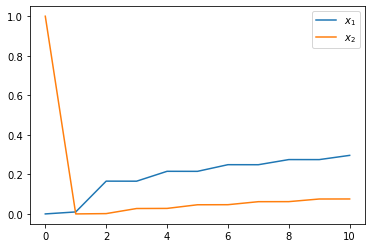

Newtons method
[0, 1]
[-0.00502513  0.        ]
[ 0.99494975 -0.01002475]
[0.99497488 0.989975  ]
[1.         0.99997475]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]

f(x) = 0.0


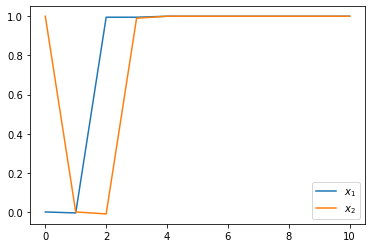


starting points: [2, 1]


steepest descent
[2, 1]
[1.10585694 1.22334964]
[1.10528981 1.22107861]
[1.10487785 1.22118149]
[1.10431673 1.21893455]
[1.10390838 1.21903653]
[1.1033532  1.21681338]
[1.10294842 1.21691446]
[1.10239912 1.2147148 ]
[1.10199788 1.214815  ]
[1.10145436 1.21263853]

f(x) = 0.010324702036916693


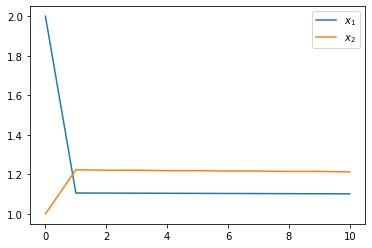

Newtons method
[2, 1]
[1.99833611 3.99334443]
[1.00055248 0.0055331 ]
[1.00054972 1.00109974]
[1.        0.9999997]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]

f(x) = 0.0


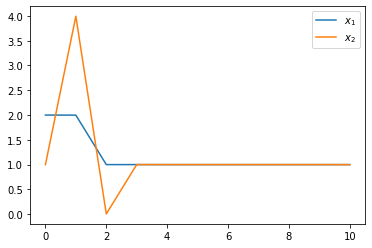

In [5]:
for s in starting:
    print("\nstarting points: {}\n\n".format(s))
    print("steepest descent")
    steepest_descent(f, s)
    print("Newtons method")
    Newtons_method(f, s)


starting points: [-1, 1]




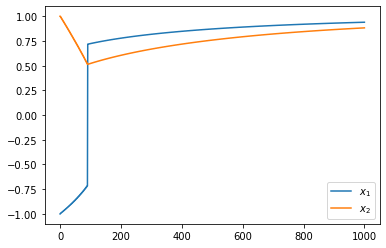

result: [0.93936208 0.88240112]


starting points: [0, 1]




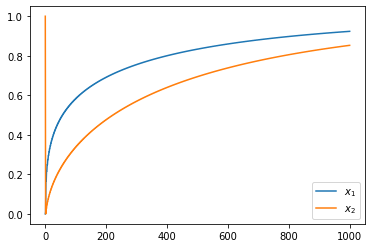

result: [0.92366306 0.85273797]


starting points: [2, 1]




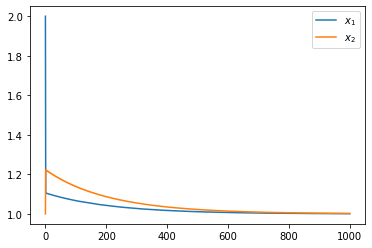

result: [1.00120103 1.00239752]



In [6]:
for s in starting:
    print("\nstarting points: {}\n\n".format(s))
    res = steepest_descent(f, s, show_steps=False, num_iterations=1000)
    print("result: {}\n".format(res))